<a href="https://colab.research.google.com/github/VishalPawar1010/poc11_Artificial_Intelligence_-_Machine_Learing/blob/main/1_Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Session 1: Linear regression

Linear regression is a statistical method that uses a straight line to model the relationship between two variables. The dependent variable is the variable that is being predicted, and the independent variable is the variable that is used to predict the dependent variable.

The equation for a linear regression model is:


```
Y = mX + c

where,
Y = dependent variable
X = independent variable
m = slope
c = intercept [ Value of Y when X = 0]

```




## Problem Statement: Medical Insurance Expense Prediction 

In [ ]:
# Create folder in drive and upload dataset onto that drive
from google.colab import drive
drive.mount('/content/drive')

# change the following command with "/content/drive/{{path_to_created_folder}}"
!ln -s "/content/drive/My Drive/Workshop/Datasets" "/content/datasets"

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np        # basic library to work with arrays
import seaborn as sns     # library for statistical data visualization
import matplotlib.pyplot as plt           # basic library for plotting graphs and visualization

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
               
import pickle

# importing confusion matrix, accuracy score, classification_report
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
import warnings
warnings.filterwarnings("ignore")

### Load Dataset

In [ ]:
insurance_data = pd.read_csv('/content/datasets/insurance.csv')
print('\nNumber of insurance beneficiaries: {} ; features per beneficiary: {}  '.format(insurance_data.shape[0],insurance_data.shape[1]))
print('')


Number of insurance beneficiaries: 1338 ; features per beneficiary: 7  



In [ ]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Exploratory data analysis [ EDA ]
Exploratory Data Analysis (EDA) is a crucial step in the data analysis process, involving the examination, visualization, and understanding of data to uncover patterns, relationships, and insights. It is typically performed at the early stages of a project to gain familiarity with the data and inform subsequent analysis and modeling tasks.

The importance of EDA cannot be overstated for several reasons:



1. **Data Understanding:** EDA helps in understanding the structure and characteristics of the data. By examining the variables, their distributions, and relationships, EDA provides insights into the data's content, quality, and potential limitations. This understanding is vital for making informed decisions during analysis.

2. **Data Cleaning and Preprocessing:** EDA aids in identifying missing values, 
outliers, inconsistencies, and other data quality issues. Through visualizations and statistical summaries, EDA allows for the detection and treatment of data anomalies, enabling data cleaning and preprocessing steps that improve the quality and reliability of subsequent analyses.

3. **Pattern Discovery:** EDA facilitates the identification of patterns, trends, and relationships within the data. By visualizing the data through plots, charts, and graphs, EDA can reveal underlying structures and correlations that may be hidden in raw data. These insights can guide further analysis, model selection, and feature engineering.

4. **Feature Selection:** EDA helps in determining the most relevant features for analysis and modeling. By assessing the relationships between variables and their impact on the target variable, EDA guides the selection of meaningful predictors. This process helps reduce dimensionality, improve model performance, and enhance interpretability.

5. **Hypothesis Generation:** EDA supports the generation of hypotheses and research questions. By exploring the data, observing patterns, and conducting statistical tests, EDA enables the formulation of hypotheses that can be further tested through formal statistical methods or machine learning techniques. This iterative process of hypothesis generation and testing forms a solid foundation for data-driven decision making.



#### Summury of the dataset

In [ ]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Each attribute has a full of 1338 non-null entries, hence the dataset has no missing values. In case, if any null values(missing values) exist, we generally replace them with mean, median, or mode.


The dataset has **4 real** and **3 categorical** attributes/features.

In [ ]:
real_cols = insurance_data.select_dtypes(exclude=['object'])
cat_cols = insurance_data.select_dtypes(include=['object'])
print("The numeric columns are: \n{} \n\nThe non-numeric columns are: \n{}"
      .format(list(real_cols.columns),list(cat_cols.columns)))

The numeric columns are: 
['age', 'bmi', 'children', 'charges'] 

The non-numeric columns are: 
['sex', 'smoker', 'region']


#### Description of the data

In [ ]:

insurance_data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,1338.0,NaN,NaN,NaN,39.207025,14.04996,18.0,27.0,39.0,51.0,64.0
sex,1338,2,male,676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,1338.0,NaN,NaN,NaN,30.663397,6.098187,15.96,26.29625,30.4,34.69375,53.13
children,1338.0,NaN,NaN,NaN,1.094918,1.205493,0.0,0.0,1.0,2.0,5.0
smoker,1338,2,no,1064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,1338,4,southeast,364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
charges,1338.0,NaN,NaN,NaN,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


* Compare means and standard devaiations for all the real columns to establish that the distributions are different.
* If there are different ranges for different continuous variables, then, the dataset will have some exceptional values very high or very low among the common values present in the dataset.




#### Check for missing values

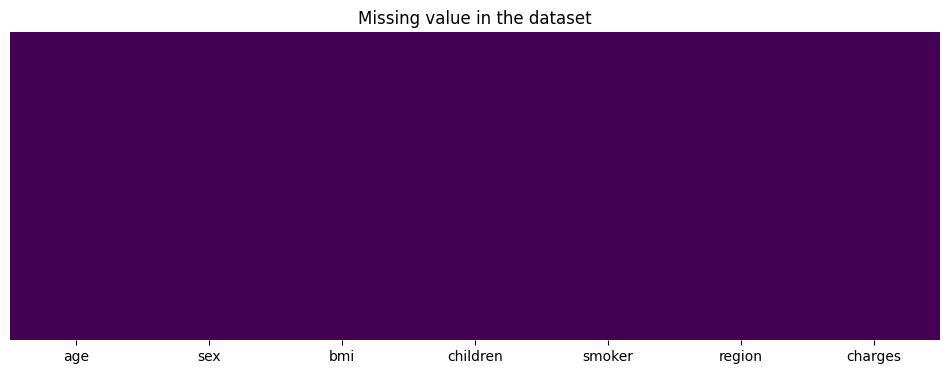

In [ ]:
plt.figure(figsize=(12,4))
sns.heatmap(insurance_data.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

There is no missing values in the dataset


#### Visualization of Correlation Matrix
A correlation matrix is a square matrix that displays the pairwise correlation coefficients between a set of variables. It is a tabular representation of the correlation relationships among multiple variables in a dataset. Each cell in the matrix represents the correlation coefficient between two variables, indicating the strength and direction of their linear relationship.

https://towardsdatascience.com/correlation-matrix-demystified-3ae3405c86c1

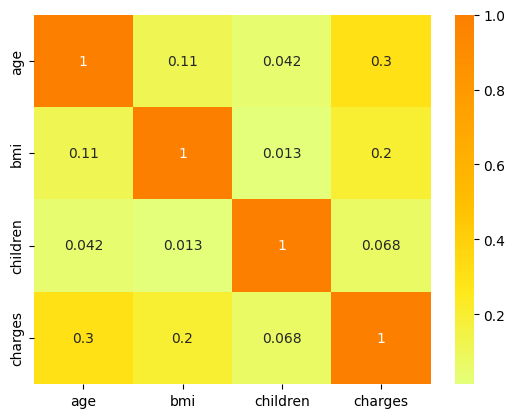

In [ ]:
corr = insurance_data.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);

#### Data Visualization


##### Visualization of Distribution of Insurance Charges

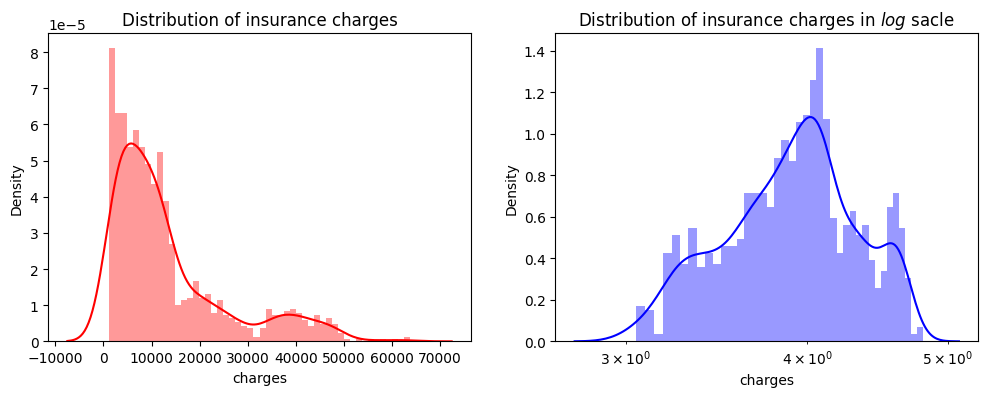

In [ ]:
f = plt.figure(figsize=(12,4))

ax = f.add_subplot(121)
sns.distplot(insurance_data['charges'], bins=50, color='r', ax=ax)
ax.set_title('Distribution of insurance charges')

ax = f.add_subplot(122)
sns.distplot(np.log10(insurance_data['charges']), bins=40, color='b', ax=ax)
ax.set_title('Distribution of insurance charges in $log$ sacle')
ax.set_xscale('log');

##### Visualization for Charges vs Sex and Charges vs Smoker

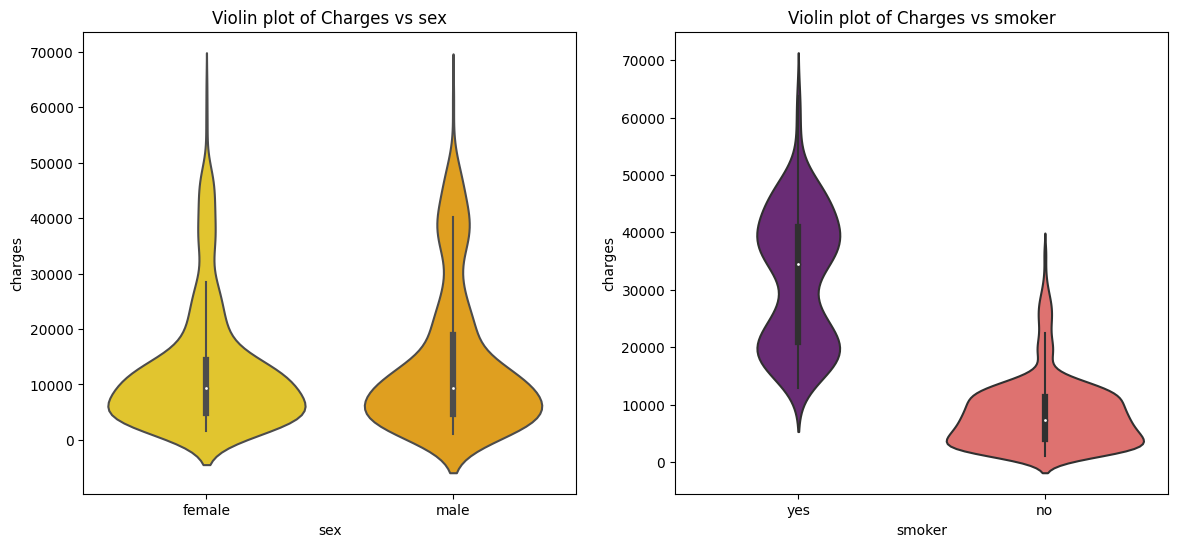

In [ ]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.violinplot(x='sex', y='charges', data=insurance_data, palette='Wistia',ax=ax)
ax.set_title('Violin plot of Charges vs sex')

ax = f.add_subplot(122)
sns.violinplot(x='smoker', y='charges', data=insurance_data, palette='magma',ax=ax)
ax.set_title('Violin plot of Charges vs smoker');

##### Visualization for Charges vs Children

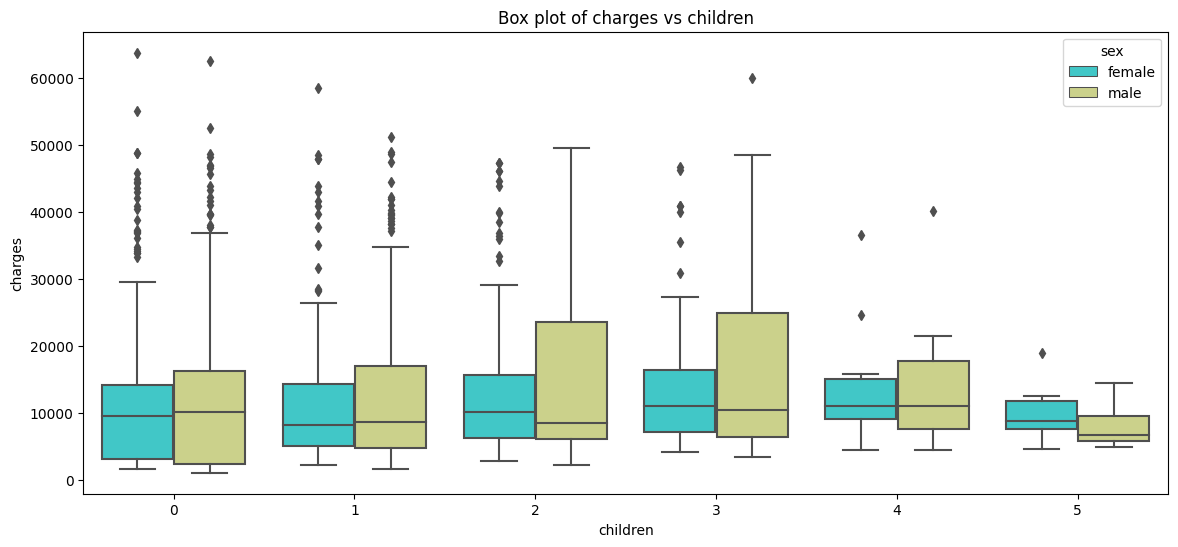

In [ ]:
plt.figure(figsize=(14,6))
sns.boxplot(x='children', y='charges', hue='sex', data=insurance_data, palette='rainbow')
plt.title('Box plot of charges vs children');

##### Visualization for Charges vs Age and Charges vs BMI

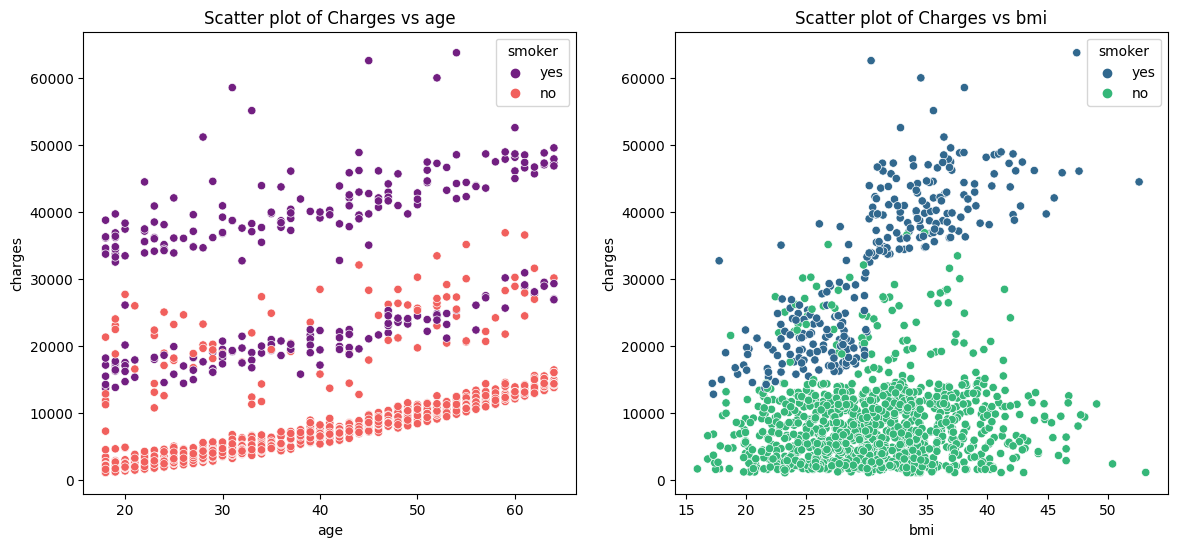

In [ ]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='age',y='charges',data=insurance_data,palette='magma',hue='smoker',ax=ax)
ax.set_title('Scatter plot of Charges vs age')

ax = f.add_subplot(122)
sns.scatterplot(x='bmi',y='charges',data=insurance_data,palette='viridis',hue='smoker')
ax.set_title('Scatter plot of Charges vs bmi')

# if you want to save the visualization
plt.savefig('sc.png');

##### Visualization for Charges vs BMI

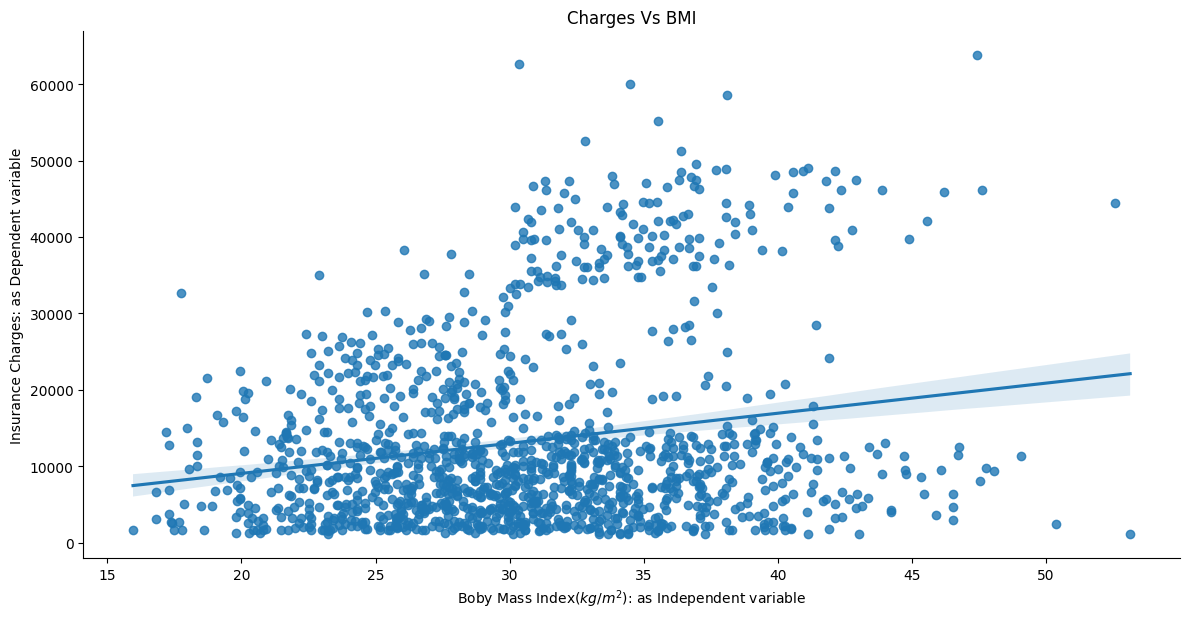

In [ ]:
sns.lmplot(x='bmi', y='charges', data=insurance_data, aspect=2, height=6)
plt.xlabel('Boby Mass Index$(kg/m^2)$: as Independent variable')
plt.ylabel('Insurance Charges: as Dependent variable')
plt.title('Charges Vs BMI');

### Date intepretation

When we look at the shape of dataset it returned $(1338,7)$. So there are  $m=1338$  training data and  $n=7$  features. Here, the target variable is charges and remaining six variables are age, sex, bmi, children, smoker, region are independent variable as shown earlier. There are multiple independent variable, so we need to fit Multiple linear regression. For this, the hypothesis function looks like

$h_{θ}(x_{i})=θ_{0}+θ_{1}age+θ_{2}sex+θ_{3}bmi+θ_{4}children+θ_{5}smoker+θ_{6}region$
 
This multiple linear regression equation for given dataset.

If $i=1$ then

$h_{θ}(x_{1})=θ_{0}+θ_{1}19+θ_{2}female+θ_{3}27.900+θ_{4}0+θ_{5}yes+θ_{6}southwest$

$y_{1}=16884.92400$

If $i=3$ then

$h_{θ}(x_{3})=θ_{0}+θ_{1}28+θ_{2}male+θ_{3}33.000+θ_{4}3+θ_{5}no+θ_{6}northwest$

$y_{3}=4449.46200$

$x_{1}=(x_{11}\hspace{0.1cm}x_{12}\hspace{0.1cm}x_{13}\hspace{0.1cm}x_{14}\hspace{0.1cm}x_{15}\hspace{0.1cm}x_{16})=(19 \hspace{0.5cm} female \hspace{0.5cm} 27.9001 \hspace{0.5cm} no \hspace{0.5cm} northwest)$


### **Matrix Formulation**

In general we can write above vector as

$x_{ij}=(x_{i1}x_{i2}...x_{in})$
 
Now, we combine all available individual vector into single input matrix of size  $(m,n)$  and denoted by  $X$  input matrix, which consist of all training examples,

$X = \begin{bmatrix}
    x_{11}       & x_{12} & x_{13} & \dots & x_{1n} \\
    x_{21}       & x_{22} & x_{23} & \dots & x_{2n} \\
    \vdots        & \vdots   & \vdots   & \vdots  & \vdots\\
    x_{m1}       & x_{m2} & x_{m3} & \dots & x_{mn}
\end{bmatrix}_{(m,n)}$

 $\hat X = \begin{bmatrix}
   1 & x_{11}       & x_{12} & x_{13} & \dots & x_{1n} \\
   1 & x_{21}       & x_{22} & x_{23} & \dots & x_{2n} \\
    \vdots        & \vdots   & \vdots   & \vdots  & \vdots\\
   1 & x_{m1}       & x_{m2} & x_{m3} & \dots & x_{mn}
\end{bmatrix}_{(m,n+1)}$

We represent parameter of function and dependent variable in vector form as

$\theta = \begin{bmatrix}
    \theta_{0}\\
    \theta_{1}\\
    \vdots    \\
    \theta_{j}  \\
    \vdots     \\
     \theta_{n}  \\
\end{bmatrix}_{(n+1,1)}$  $Y = \begin{bmatrix}
    y_{1}\\
    y_{2}\\
    \vdots    \\
    y_{i}  \\
    \vdots     \\
    y_{m}  \\
\end{bmatrix}_{(m,1)}$  

 
Here, we represent hypothesis function in vectorized form

$h_{θ}(X)=X_{θ} =  X \theta$

### **Cost Function**

A cost function measures how much error is there in the model by checking in terms of ability to estimate the relationship between  x  and  y . We can measure the accuracy of our hypothesis function by using a cost function. This takes an average difference of observed dependent variable in the given the dataset and those predicted by the hypothesis function.

$J(θ) = \frac{1}{m}\sum_{i=1}^{m} (\hat{y}_{i}−y_{i})^2$

$J(θ) = \frac{1}{m}\sum_{i=1}^{m} (h_{\theta}({x}_{i})−y_{i})^2$
  
To implement the linear regression, you should take training example add an extra column that is  $x_{0}$  feature, where  $x_{0}$=1 .  

$x_{0} =(x_{i_{0}}x_{i_{1}}x_{i_{2}}...x_{m_{i}})$ ,

where  $x_{i_{0}}=0$  and input matrix will become as

$X = \begin{bmatrix}
    x_{10}       & x_{11} & x_{12} & \dots & x_{1n} \\
    x_{20}       & x_{21} & x_{22} & \dots & x_{2n} \\
    \vdots        & \vdots   & \vdots   & \vdots  & \vdots\\
    x_{m0}       & x_{m1} & x_{m2} & \dots & x_{mn}
\end{bmatrix}_{(m,n+1)}$ 

Each of the m input samples is similar to a column vector with n+1 rows,  $x_{0}$  being 1 for our convenience, that is  $x_{10},x_{20},x_{30}...x_{m0}=1$ . Now, we rewrite the ordinary least square cost function in matrix form as:

$J(θ)=\frac{1}{m}(X_{θ}−Y)^T(X_{θ}−Y)$
 
Let's look at the matrix multiplication concept. The multiplication of two matrix happens only if number of column of first matrix is equal to number of rows of second matrix. Here, input matrix  X  of size  $(m,n+1)$ , parameter of function is of size  $(n+1,1)$  and dependent variable vector of size  $(m,1)$ . The product of matrix  $X(m,n+1)θ(n+1,1)$  will return a vector of size  (m,1) , then product of $(X_{θ}−Y)^T_{(1,m)}(X_{θ}−Y)_{(m,1)}$  will return size of unit vector.



### **Normal Equation**

The normal equation is an analytical solution to the linear regression problem with a ordinary least square cost function. To minimize our cost function, take partial derivative of  $J(θ)$  with respect to  $θ$  and equate to  $0$. The derivative of function is nothing but checking that for a small change in input what would be the change in output of function.

$min_{θ_{0},θ_{1}...θ_{n}}J(θ_{0},θ_{1}..θ_{n})$
 
$\frac{∂J(θ_{j})}{∂ θ_{j}}=0$
 
where  j=0,1,2,....n 

Now we will apply partial derivative to our cost function,

$\frac{∂J(θ_{j})}{∂ θ_{j}}=\frac{\partial}{\partial \theta} (X_{\theta}-Y)^T(X_{\theta}-Y)$


 
We will remove 1/m  since we are going to equate the derivative to 0 and solve $J(θ)$. 

$J(θ)=(X_{θ}−Y)^T(X_{θ}−Y)$
 
=$(X_{θ}^T−Y^T)(X_{θ}−Y)$
 

=$(Xθ)^T−Y^T)(Xθ−Y)$
 
=$(Xθ)^T Xθ−Y^TXθ−(Xθ)^TY+Y^TY$
 
=$θ^T X^TXθ−2(Xθ)^T Y+Y^TY$

Here $\theta$ is unknown. To find where the above function has a minimum, we will derive by $\theta$ and equate it to 0. Also, we only use matrix notation to conveniently represent a system of linear formula. So, we derive by each component of the vector, and then combine the resulting derivatives into a vector again. 
 
$\frac{∂J(θ)}{∂θ}=\frac{∂}{∂θ}(θ^T X^TXθ−2θ^T X^TY+Y^TY)$
 
$0= 2 X^TXθ−2  X^Ty$
 
$ X^TXθ = X^TY$
 
$θ=(X^TX)^{(−1)} X^TY$
 
This is the normal equation for linear regression. 


### Data Preprocessing

Machine learning algorithms cannot work with categorical data directly. So,categorical data must be converted to number. We do the conversion in three ways:

1. Label Encoding

2. One hot encoding

3. Dummy variable trap

**`Label encoding`** refers to transforming the word labels into numerical form so that the algorithms can understand how to operate on them.

A **`One hot encoding`** is a representation of categorical variable as binary vectors. It allows the representation of categorical data to be more expressive. This first requires that the categorical values should be mapped to integer values, that is label encoding is performed. Then, each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with 1.

The **`Dummy variable trap`** is a scenario in which the independent variable are multicollinear, a scenario in which two or more variables are highly correlated. In simple terms, one variable can be predicted from the others.

Multicollinearity is a statistical calculation in which the independent or explanatory variables are interrelated to each other. Due to this multicollinearity, the model algorithm can not calculate the true relationship between dependent and explanatory variables as the outcome of the prediction has errors

By using pandas `get_dummies` function we can do all above three step in line of code. We will use this fuction to get dummy variable for sex, children,smoker, and region. By setting drop_first =True, function will remove dummy variable trap by droping original variable. To know more about pandas get_dummies, click [here](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html). 


In [ ]:
# Dummy variable
categorical_columns = ['sex','children', 'smoker', 'region']

insurance_data_encode = pd.get_dummies(data = insurance_data, prefix = 'OHE', prefix_sep='_',
               columns = categorical_columns,
               drop_first =True,
              dtype='int8')

#### Normalize the data

Earlier we have observed that the ranges of different continuous variables are different. This is actually problematic. Therefore, we perform normalization for continuous variable.

The goal of normalization is to change the values of numeric columns in the dataset to a common scale without distorting differences in the ranges of values. We normalize the data to bring all the variables to the same range. For this we can use MinMaxScaler. It scales and translates each feature individually such that it is in the given range on the training set, e.g. between [0,1] or else in the range [-1, 1] if there are negative values in the dataset. To learn more about MinMaxScaler [click here.](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

In [ ]:
# Normalization
scaler = MinMaxScaler()

insurance_data_encode[["charges"]] = scaler.fit_transform(insurance_data_encode[["charges"]])

insurance_data_encode.head()

,age,bmi,charges,OHE_male,OHE_1,OHE_2,OHE_3,OHE_4,OHE_5,OHE_yes,OHE_northwest,OHE_southeast,OHE_southwest
0,19,27.900,0.251611,0,0,0,0,0,0,1,0,0,1
1,18,33.770,0.009636,1,1,0,0,0,0,0,0,1,0
2,28,33.000,0.053115,1,0,0,1,0,0,0,0,1,0
3,33,22.705,0.333010,1,0,0,0,0,0,0,1,0,0
4,32,28.880,0.043816,1,0,0,0,0,0,0,1,0,0


#### Splitting the dataset into train and test sets


In [ ]:
X = insurance_data_encode.drop('charges',axis=1) # Independent feature
y = insurance_data_encode['charges'] # Dependent features

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

### Model building

#### Implementing Linear Regression using Scikit learn

1. Create an object of Linear Regression function
  
  *lr = LinearRegression()*

2. Fit the training data(features, dependent variable) using the `fit` method from sklearn.linear_model

  *fit(X_train, y_train)*

3. `Predict` the results using the test data that serves as unknown features to the linear regression model.

  *y_pred = lr.predict(X_test)*

4. Find the `Root Mean Square Error` i.e. the difference between the predicted value and the test set value.

  *rmse(y_test,y_pred)*

5. Finally, find the `R2 Score` for y_test and y_pred that depicts the accuracy score of the model built.

  *r2_score(y_test,y_pred)*

If you want to learn more about sklearn Linear Regression, click 
[here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train, )



LinearRegression()

#### Model Evaluation using sklearn module


If you want to know more about $R^2$ score, click 
[here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)

If you want to know more about Mean Square Error, click 
[here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)


In [ ]:
# Prediction using sklearn regression module
y_pred_sk = lin_reg.predict(X_test)

# Evaluation: MSE
J_mse_sk = mean_squared_error(y_pred_sk, y_test)
print(J_mse_sk)


# R_square
R_square_sk = lin_reg.score(X_test,y_test)

print(R_square_sk)

0.008956304682331852
0.7305284299807451


The low value for MSE denotes that our model has least error values. The R square value denotes the accuracy of the model. As the accuracy of the model increases, the R square value reaches close to 1.